<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/E-Commerce%20Domain%20Analytics%20Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
#!pip install gdown

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import pearsonr,spearmanr

## Loading Datasets & Changing Data Types

In [3]:
!gdown 1da0C0bzM_eyXLRRQ56EHz0kDzc1sYOUc

Downloading...
From: https://drive.google.com/uc?id=1da0C0bzM_eyXLRRQ56EHz0kDzc1sYOUc
To: /content/CustomersData.xlsx
100% 42.2k/42.2k [00:00<00:00, 47.4MB/s]


In [4]:
CustomersData = pd.read_excel("CustomersData.xlsx")

In [5]:
!gdown 1_-VvRXtcJuX5WpRqVeuGVNa_IfUAgOW8

Downloading...
From: https://drive.google.com/uc?id=1_-VvRXtcJuX5WpRqVeuGVNa_IfUAgOW8
To: /content/Discount_Coupon.csv
100% 4.92k/4.92k [00:00<00:00, 12.7MB/s]


In [6]:
Discount_Coupon = pd.read_csv("Discount_Coupon.csv")

In [7]:
!gdown 1ctNiusdseIZ6Vrvy600oZmu5C1aTbYzV

Downloading...
From: https://drive.google.com/uc?id=1ctNiusdseIZ6Vrvy600oZmu5C1aTbYzV
To: /content/Marketing_Spend.csv
100% 8.67k/8.67k [00:00<00:00, 24.1MB/s]


In [8]:
Marketing_Spend = pd.read_csv("Marketing_Spend.csv")

In [9]:
!gdown 1dkV1EVylOCBXi_qtx4iMCxRKDHcbPVC9

Downloading...
From: https://drive.google.com/uc?id=1dkV1EVylOCBXi_qtx4iMCxRKDHcbPVC9
To: /content/Online_Sales.csv
100% 5.24M/5.24M [00:00<00:00, 117MB/s]


In [10]:
Online_Sales = pd.read_csv("Online_Sales.csv")

In [11]:
!gdown 16Fl-Ddhdj1HhDl1TAmuRg0-RRsUb3X8X

Downloading...
From: https://drive.google.com/uc?id=16Fl-Ddhdj1HhDl1TAmuRg0-RRsUb3X8X
To: /content/Tax_amount.xlsx
100% 9.84k/9.84k [00:00<00:00, 25.4MB/s]


In [12]:
Tax_amount = pd.read_excel("Tax_amount.xlsx")

In [13]:
CustomersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [14]:
CustomersData.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [15]:
Discount_Coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [16]:
Discount_Coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [17]:
Discount_Coupon.Month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [18]:
Marketing_Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [19]:
Marketing_Spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [20]:
Marketing_Spend.Date = pd.to_datetime(Marketing_Spend["Date"])
Marketing_Spend["Month"] = Marketing_Spend.Date.dt.strftime("%b")

In [21]:
Marketing_Spend["Total_Spend"] = Marketing_Spend["Offline_Spend"]+ Marketing_Spend["Online_Spend"]

In [22]:
Marketing_Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
 3   Month          365 non-null    object        
 4   Total_Spend    365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 14.4+ KB


In [23]:
Online_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [24]:
Online_Sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [25]:
Online_Sales.Transaction_Date = pd.to_datetime(Online_Sales["Transaction_Date"])
Online_Sales["Transaction_Month"] = Online_Sales.Transaction_Date.dt.strftime("%b")

In [26]:
Online_Sales["Transaction_Month"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [27]:
Online_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Transaction_Month    52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.4+ MB


In [28]:
Online_Sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan


In [29]:
Tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [30]:
Tax_amount.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


## Creating Combined Data set

* Merging Online Sales & Discount Coupon into "Data"

In [31]:
data = Online_Sales.merge(Discount_Coupon,how = "left", left_on = ["Product_Category","Transaction_Month"],right_on = ["Product_Category","Month"])

* Merging "data" & Tax_amount

In [32]:
data = data.merge(Tax_amount, how ="left", on = "Product_Category")

* Merging "data" & CustomerData

In [33]:
data = data.merge(CustomersData, how ="left", on = "CustomerID")

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Transaction_Month    52924 non-null  object        
 11  Month                52524 non-null  object        
 12  Coupon_Code          52524 non-null  object        
 13  Discount_pct         52524 non-

* There are 400 Missing values in Discount_pct... we will Fill with Zero as there are no Details for that specific Product Category and Month

In [35]:
data.drop("Month", axis=1,inplace = True)

In [36]:
data["Discount_pct"].fillna(0,inplace = True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Transaction_Month    52924 non-null  object        
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52924 non-null  float64       
 13  GST                  52924 non-

In [38]:
# 0 --> Monday , 6 --> Sunday
data["weekday"] = data["Transaction_Date"].dt.weekday
data["month"] =data["Transaction_Date"].dt.month
data.duplicated().sum()

0

## Calculating Invoice amount

In [39]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,weekday,month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12,1,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12,1,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,M,Chicago,12,1,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,M,Chicago,12,1,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,M,Chicago,12,1,1


In [40]:
data["Coupon_Status"].value_counts()

Coupon_Status
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64

* Lets Assume "Clicked" means "Used"

In [41]:
data["Coupon_Status"]= data["Coupon_Status"].transform(lambda x : 1 if x in ["Clicked","Used"] else 0)

In [42]:
data["Coupon_Status"].value_counts()

Coupon_Status
1    44830
0     8094
Name: count, dtype: int64

In [43]:
data["Discount_pct"] = data["Discount_pct"].transform(lambda x : x/100)

In [44]:
data["Invoice_value"] = ((data["Quantity"] * data["Avg_Price"] * (1 - (data["Discount_pct"] * data["Coupon_Status"]))) * (1+data["GST"])) + data["Delivery_Charges"]

In [45]:
data["Invoice_value"].describe()

count    52924.000000
mean        92.166833
std        158.532102
min          4.375440
25%         18.828960
50%         41.672580
75%        123.810000
max       8979.275000
Name: Invoice_value, dtype: float64

In [46]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,weekday,month,Invoice_value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,1,Jan,ELEC10,0.1,0.10,M,Chicago,12,1,1,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,1,Jan,ELEC10,0.1,0.10,M,Chicago,12,1,1,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,1,Jan,OFF10,0.1,0.10,M,Chicago,12,1,1,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,0,Jan,SALE10,0.1,0.18,M,Chicago,12,1,1,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,1,Jan,AIO10,0.1,0.18,M,Chicago,12,1,1,24.0230


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  int64         
 10  Transaction_Month    52924 non-null  object        
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52924 non-null  float64       
 13  GST                  52924 non-

* No Duplicates records Found

# EDA

In [48]:
data.nunique()

CustomerID              1468
Transaction_ID         25061
Transaction_Date         365
Product_SKU             1145
Product_Description      404
Product_Category          20
Quantity                 151
Avg_Price                546
Delivery_Charges         267
Coupon_Status              2
Transaction_Month         12
Coupon_Code               45
Discount_pct               4
GST                        4
Gender                     2
Location                   5
Tenure_Months             49
weekday                    7
month                     12
Invoice_value          12145
dtype: int64

## Invoice amount

In [163]:
# Total Invoice Revenue
np.round(data["Invoice_value"].sum(axis = 0))

4877837.0

In [164]:
# Average Invoice Revenue per month
np.round(data["Invoice_value"].sum(axis = 0)/12)

406486.0

In [176]:
# Invoicevalue per TransactionID
A = data.groupby(["Transaction_ID","Transaction_Month"])["Invoice_value"].sum().reset_index()
A

,Transaction_ID,Transaction_Month,Invoice_value
0,16679,Jan,158.67290
1,16680,Jan,158.67290
2,16681,Jan,8.52950
3,16682,Jan,801.64840
4,16684,Jan,336.76960
...,...,...,...
25056,48493,Dec,99.90100
25057,48494,Dec,46.90792
25058,48495,Dec,123.44760
25059,48496,Dec,316.50200


In [166]:
A["Invoice_value"].describe()

count    25061.000000
mean       194.638581
std        416.984028
min          6.392700
25%         66.830000
50%        124.710000
75%        230.020000
max      24131.254000
Name: Invoice_value, dtype: float64

<Axes: xlabel='Invoice_value'>

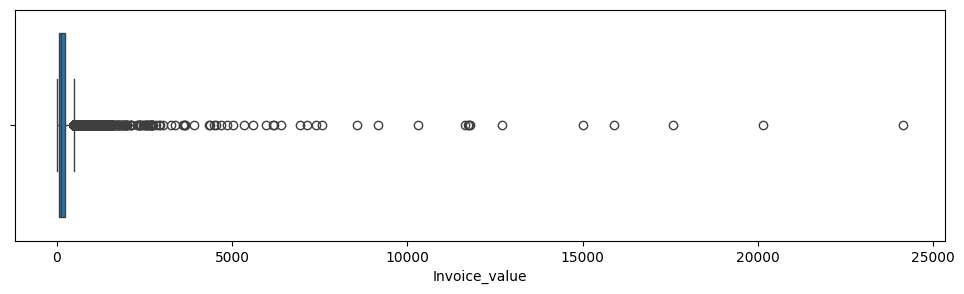

In [167]:
plt.figure(figsize =(12,3))
sns.boxplot(x= A["Invoice_value"])

In [168]:
# Invoice MonthWise
data.groupby("Transaction_Month")["Invoice_value"].sum()

Transaction_Month
Apr    454557.54294
Aug    431970.02304
Dec    467526.63756
Feb    339053.97194
Jan    470488.17309
Jul    430673.45689
Jun    308923.49697
Mar    356260.27661
May    328973.50236
Nov    492551.06702
Oct    457496.14952
Sep    339363.17262
Name: Invoice_value, dtype: float64

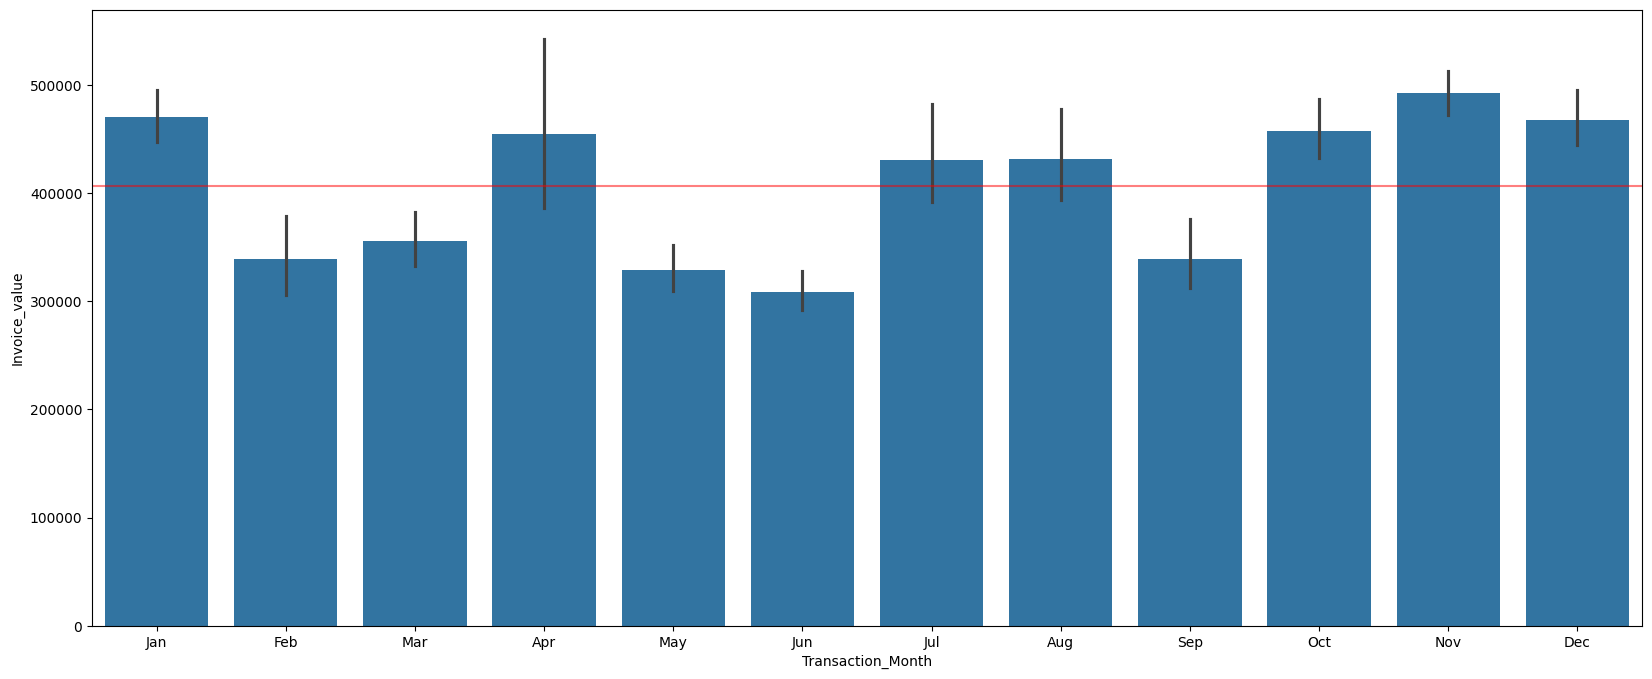

In [169]:
# Invoice MonthWise
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="Transaction_Month",y = "Invoice_value", order = Online_Sales["Transaction_Month"].unique(),estimator=np.sum)
# drawing average line
ax.axhline(A["Invoice_value"].sum()/12, color='red', alpha = 0.5)

## Average Order Value

In [172]:
data["Invoice_value"].sum(axis =0)/data["Transaction_ID"].nunique()

194.63858068552727

In [177]:
A

,Transaction_ID,Transaction_Month,Invoice_value
0,16679,Jan,158.67290
1,16680,Jan,158.67290
2,16681,Jan,8.52950
3,16682,Jan,801.64840
4,16684,Jan,336.76960
...,...,...,...
25056,48493,Dec,99.90100
25057,48494,Dec,46.90792
25058,48495,Dec,123.44760
25059,48496,Dec,316.50200


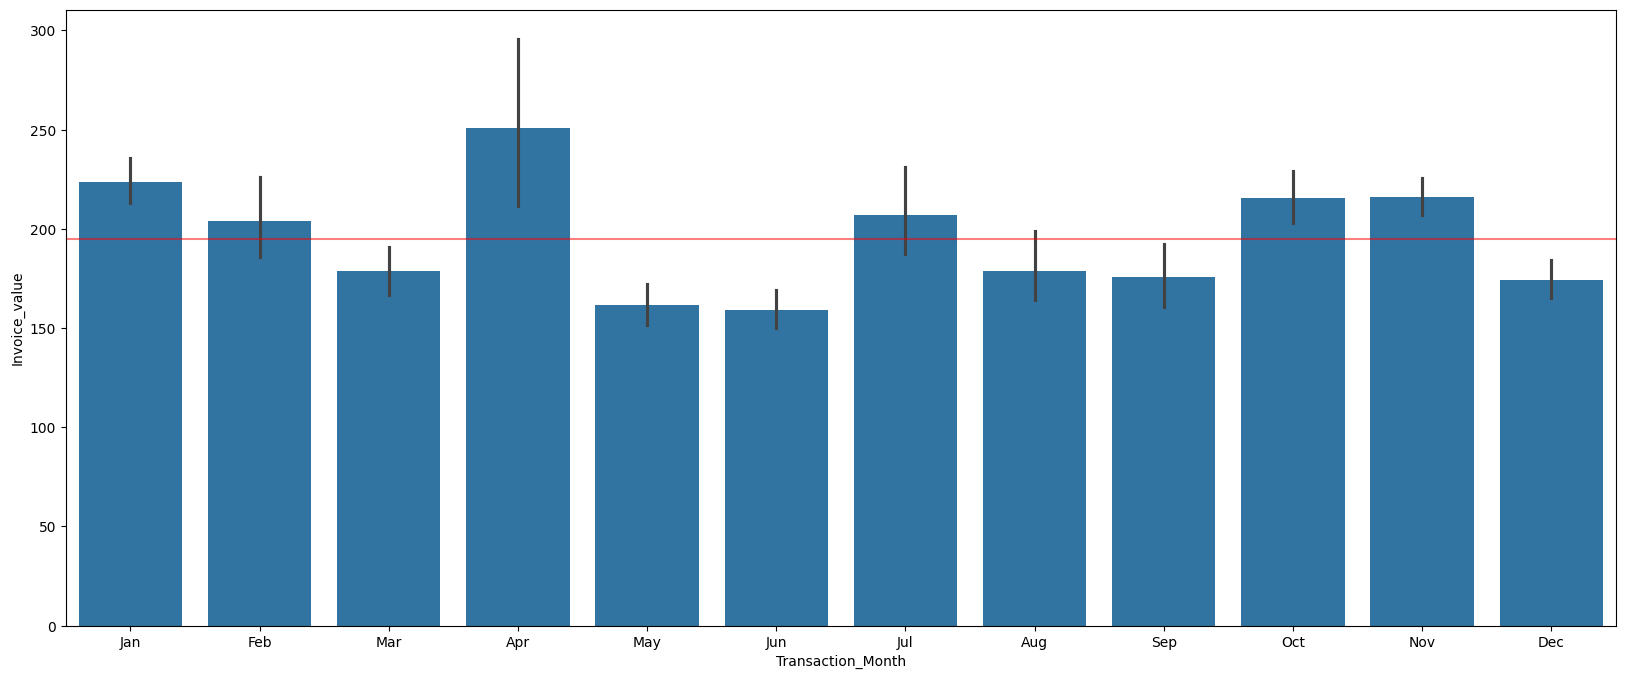

In [178]:
# Average Order value Month Wise
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=A, x="Transaction_Month", y="Invoice_value", estimator = np.mean,order = Online_Sales["Transaction_Month"].unique())
#drawing average line
ax.axhline(data["Invoice_value"].sum(axis =0)/data["Transaction_ID"].nunique(), color='red', alpha = 0.5)

## No of Orders

In [59]:
data["Transaction_ID"].nunique()

25061

In [170]:
A = data.groupby("Transaction_Month")["Transaction_ID"].nunique().reset_index()
A

,Transaction_Month,Transaction_ID
0,Apr,1813
1,Aug,2414
2,Dec,2684
3,Feb,1664
4,Jan,2102
5,Jul,2080
6,Jun,1940
7,Mar,1991
8,May,2034
9,Nov,2282


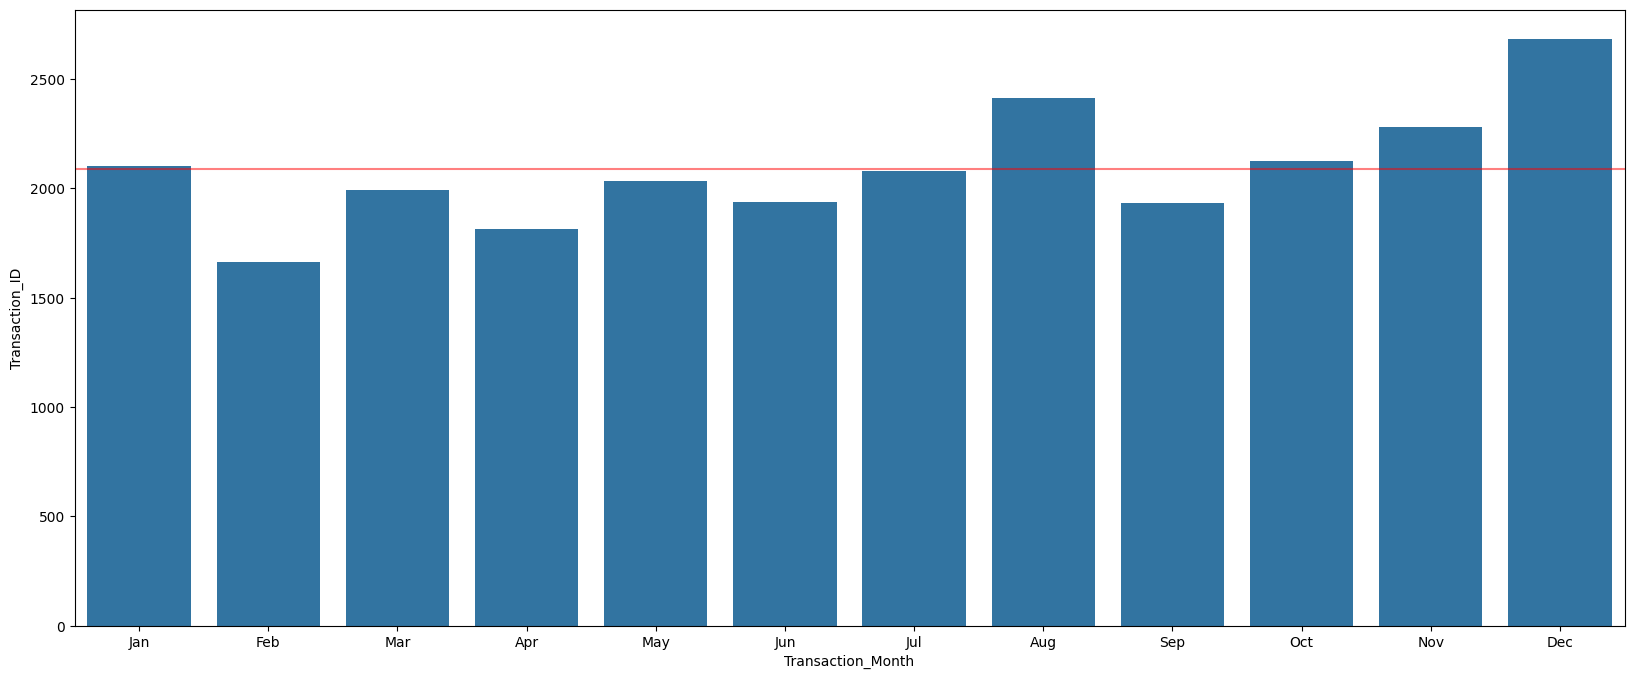

In [171]:
# No of Orders Month Wise
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="Transaction_Month",y = "Transaction_ID", order = Online_Sales["Transaction_Month"].unique())
#drawing average line
ax.axhline(data["Transaction_ID"].nunique()/12, color='red', alpha = 0.5)

## No of Customers

In [62]:
data["CustomerID"].nunique()

1468

In [63]:
A = data.groupby("Transaction_Month")["CustomerID"].nunique().reset_index()
A

,Transaction_Month,CustomerID
0,Apr,224
1,Aug,300
2,Dec,236
3,Feb,109
4,Jan,215
5,Jul,236
6,Jun,259
7,Mar,208
8,May,200
9,Nov,188


In [64]:
# Average No of Customer Visting
data.groupby("Transaction_Month")["CustomerID"].nunique().sum(axis=0)/12

214.83333333333334

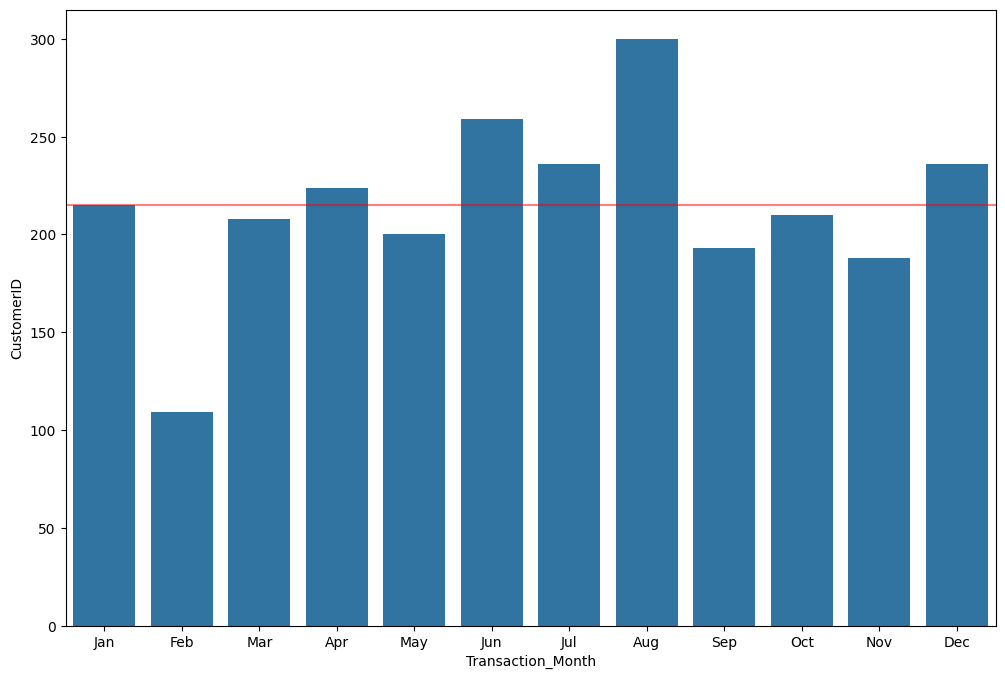

In [65]:
# No of Customer Visiting Each month
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data = A, x ="Transaction_Month",y = "CustomerID", order = Online_Sales["Transaction_Month"].unique())
#drawing average line
ax.axhline(data.groupby("Transaction_Month")["CustomerID"].nunique().sum(axis=0)/12, color='red', alpha = 0.5)

## Customer OnBoarding & Attrition in the Given year

In [231]:
A = data.groupby("CustomerID").aggregate({"month":[min,max]}).reset_index()
A.columns = ["CustomerID","firstmonth","lastmonth"]
A

,CustomerID,firstmonth,lastmonth
0,12346,9,9
1,12347,3,11
2,12348,6,10
3,12350,12,12
4,12356,9,9
...,...,...,...
1463,18259,4,4
1464,18260,6,10
1465,18269,4,6
1466,18277,10,10


In [232]:
A.groupby("firstmonth")["CustomerID"].count()

firstmonth
1     215
2      96
3     177
4     163
5     112
6     137
7      94
8     135
9      78
10     87
11     68
12    106
Name: CustomerID, dtype: int64

<Axes: xlabel='firstmonth'>

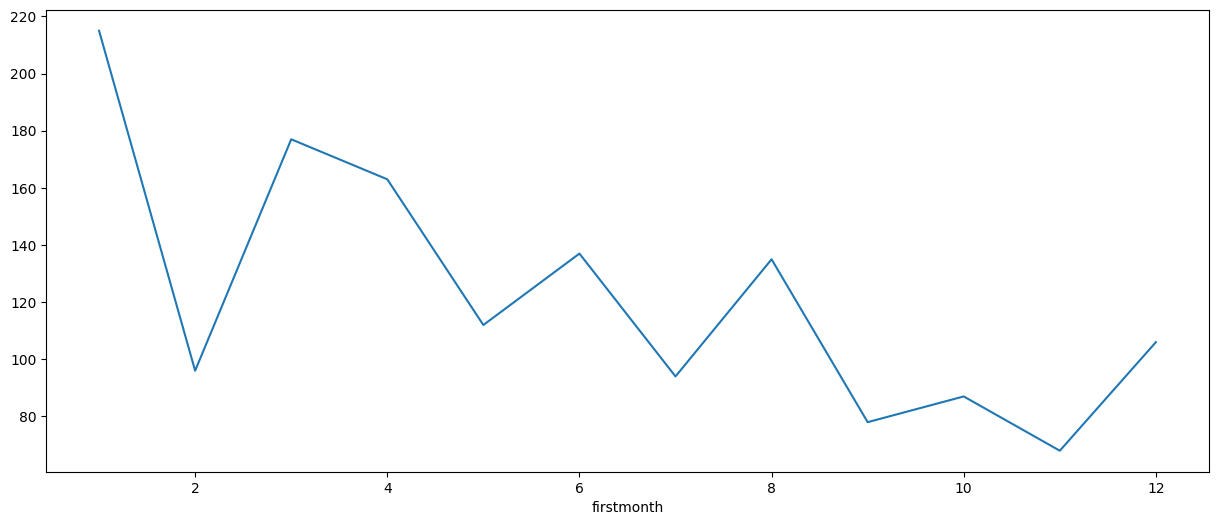

In [236]:
# No of New Customer Joined in Each Month
fig, ax = plt.subplots(figsize=(15,6))
A.groupby("firstmonth")["CustomerID"].count().plot()

In [234]:
A.groupby("lastmonth")["CustomerID"].count()

lastmonth
1      96
2      31
3      74
4      99
5      83
6     118
7     113
8     166
9     138
10    154
11    160
12    236
Name: CustomerID, dtype: int64

<Axes: xlabel='lastmonth'>

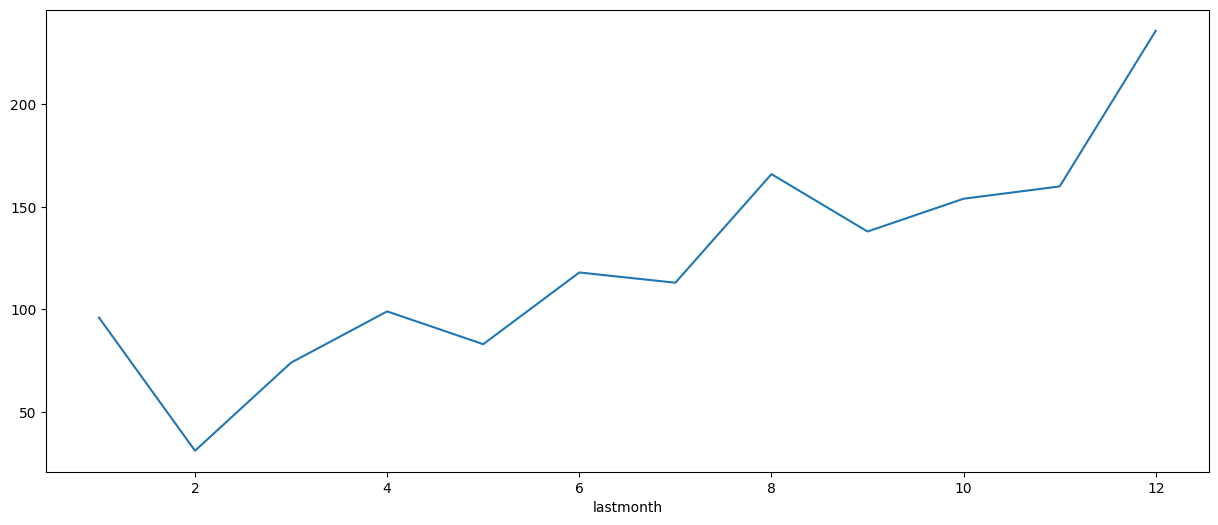

In [237]:
# No of Customer who dropped off in each month
fig, ax = plt.subplots(figsize=(15,6))
A.groupby("lastmonth")["CustomerID"].count().plot()

## Cohort Analysis

In [239]:
A = data.groupby("CustomerID").aggregate({"month":[min,max]}).reset_index()
A.columns = ["CustomerID","firstmonth","lastmonth"]
A

,CustomerID,firstmonth,lastmonth
0,12346,9,9
1,12347,3,11
2,12348,6,10
3,12350,12,12
4,12356,9,9
...,...,...,...
1463,18259,4,4
1464,18260,6,10
1465,18269,4,6
1466,18277,10,10


In [240]:
Z = CustomersData.merge(A, on ="CustomerID")

In [241]:
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth
0,17850,M,Chicago,12,1,1
1,13047,M,California,43,1,12
2,12583,M,Chicago,33,1,8
3,13748,F,California,30,1,1
4,15100,M,California,49,1,8
...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12
1464,12956,F,Chicago,48,12,12
1465,15781,M,New Jersey,19,12,12
1466,14410,F,New York,45,12,12


In [242]:
B=data.groupby("CustomerID").aggregate({"Transaction_Date":[min,max]}).reset_index()
B.columns = ["CustomerID","firsttransaction","Lasttrasaction"]
B

,CustomerID,firsttransaction,Lasttrasaction
0,12346,2019-09-15,2019-09-15
1,12347,2019-03-24,2019-11-02
2,12348,2019-06-22,2019-10-19
3,12350,2019-12-14,2019-12-14
4,12356,2019-09-15,2019-09-15
...,...,...,...
1463,18259,2019-04-05,2019-04-05
1464,18260,2019-06-22,2019-10-05
1465,18269,2019-04-05,2019-06-20
1466,18277,2019-10-23,2019-10-23


In [243]:
Z = Z.merge(B, on ="CustomerID")

In [244]:
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26
1,13047,M,California,43,1,12,2019-01-01,2019-12-18
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02
3,13748,F,California,30,1,1,2019-01-01,2019-01-01
4,15100,M,California,49,1,8,2019-01-01,2019-08-30
...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31


In [245]:
C=data.groupby("CustomerID")["Transaction_ID"].nunique()
C

CustomerID
12346     1
12347    31
12348     8
12350    11
12356    13
         ..
18259     3
18260    19
18269     2
18277     1
18283    53
Name: Transaction_ID, Length: 1468, dtype: int64

In [246]:
Z = Z.merge(C, on ="CustomerID")

In [247]:
Z.rename(columns = {'Transaction_ID':'No of Transactions'}, inplace = True)
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6
...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31,5
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31,14
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31,3
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31,6


In [248]:
Z["ActiveDays"] =(Z["Lasttrasaction"]-Z["firsttransaction"])/np.timedelta64(1, 'D')
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions,ActiveDays
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177,25.0
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26,351.0
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15,213.0
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1,0.0
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6,241.0
...,...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31,5,1.0
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31,14,0.0
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31,3,0.0
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31,6,0.0


<Axes: xlabel='ActiveDays', ylabel='Count'>

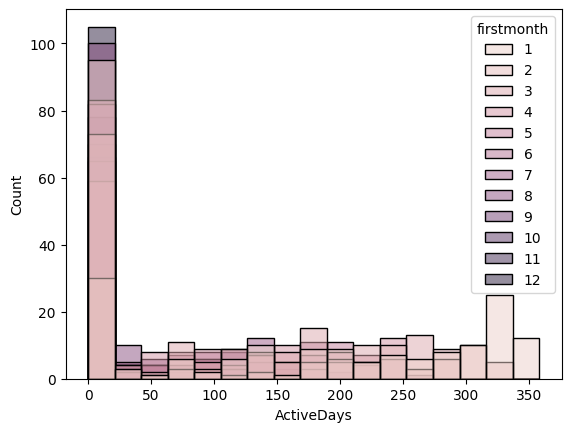

In [249]:
sns.histplot(data = Z, x="ActiveDays", hue = "firstmonth")

<Axes: ylabel='ActiveDays'>

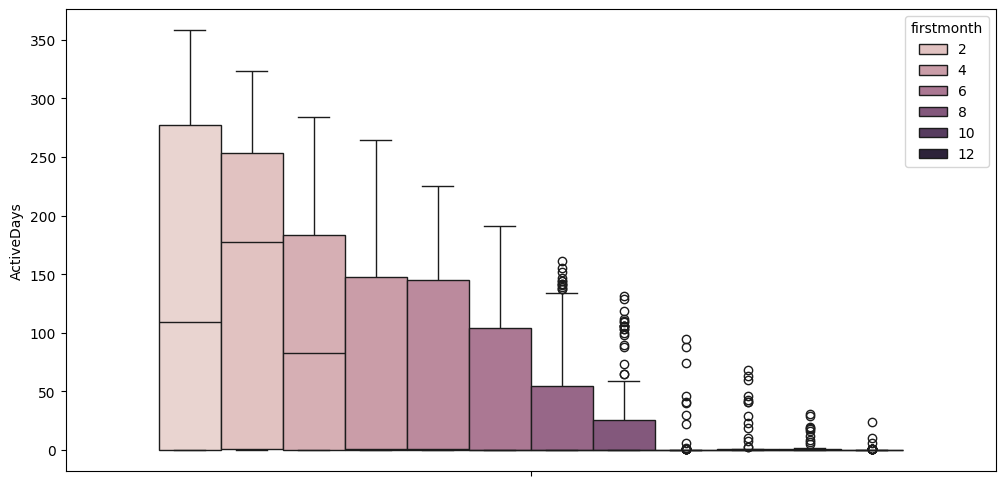

In [250]:
plt.figure(figsize=(12,6))
sns.boxplot(data = Z, y="ActiveDays", hue = "firstmonth")

In [251]:
Z.groupby("firstmonth").aggregate({"ActiveDays":[min,max]})

ActiveDays       
                  min    max
firstmonth                  
1                 0.0  358.0
2                 0.0  323.0
3                 0.0  284.0
4                 0.0  264.0
5                 0.0  225.0
6                 0.0  191.0
7                 0.0  161.0
8                 0.0  131.0
9                 0.0   95.0
10                0.0   68.0
11                0.0   31.0
12                0.0   24.0

In [252]:
Z.groupby("firstmonth")["ActiveDays"].mean()

firstmonth
1     132.995349
2     151.895833
3     102.627119
4      72.570552
5      67.607143
6      48.722628
7      34.000000
8      20.074074
9       5.807692
10      5.413793
11      2.573529
12      0.537736
Name: ActiveDays, dtype: float64

<Axes: xlabel='firstmonth'>

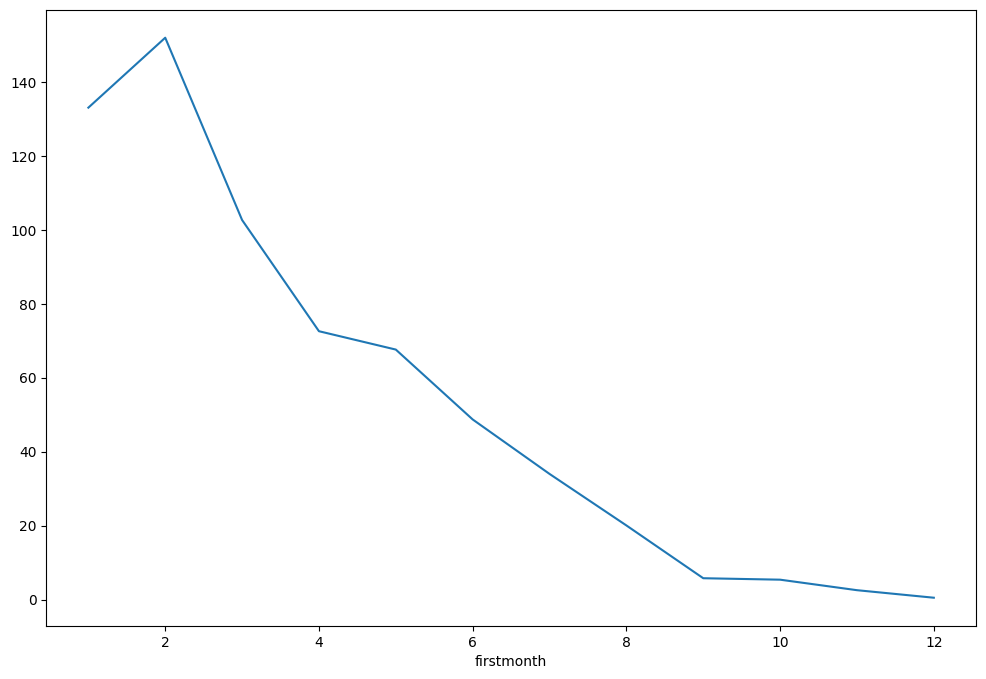

In [255]:
# Cohort Analysis --> Average Active days for a given cohort
plt.figure(figsize=(12,8))
Z.groupby("firstmonth")["ActiveDays"].mean().plot()

## Average time between Orders for Customer

In [86]:
# If Customer bought only once in agiven year considering customer for frequency of 1 in 365 days
Z["ActiveDays"]= Z["ActiveDays"].transform(lambda x : x if x!= 0.0 else 365)
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions,ActiveDays
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177,25.0
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26,351.0
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15,213.0
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1,365.0
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6,241.0
...,...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31,5,1.0
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31,14,365.0
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31,3,365.0
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31,6,365.0


<Axes: xlabel='ActiveDays', ylabel='No of Transactions'>

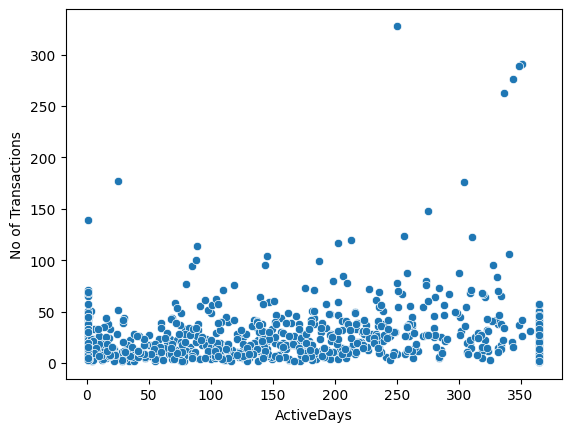

In [87]:
sns.scatterplot(data=Z, x ="ActiveDays", y="No of Transactions")

In [88]:
Z["AveOrderDays"] = Z["ActiveDays"]/Z["No of Transactions"]

In [89]:
Z["AveOrderDays"].describe()

count    1468.000000
mean       62.238642
std       101.646725
min         0.007194
25%         5.107724
50%        19.210526
75%        60.833333
max       365.000000
Name: AveOrderDays, dtype: float64

<Axes: xlabel='AveOrderDays', ylabel='Density'>

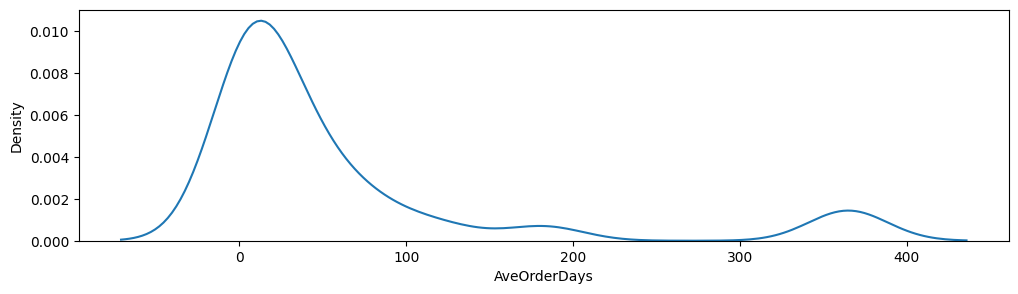

In [90]:
plt.figure(figsize=(12,3))
sns.kdeplot(x= Z["AveOrderDays"])

## Average ordervalue by Customer

In [91]:
D = data.groupby("CustomerID")["Invoice_value"].sum()

In [92]:
Z = Z.merge(D,on ="CustomerID")
Z.rename(columns = {'Invoice_value':'TotalSpent'}, inplace = True)
Z

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions,ActiveDays,AveOrderDays,TotalSpent
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177,25.0,0.141243,38365.75823
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26,351.0,13.500000,2957.89355
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15,213.0,14.200000,3113.65770
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1,365.0,365.000000,7.81688
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6,241.0,40.166667,904.97624
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,14438,F,New York,41,12,12,2019-12-30,2019-12-31,5,1.0,0.200000,465.20604
1464,12956,F,Chicago,48,12,12,2019-12-31,2019-12-31,14,365.0,26.071429,2610.29915
1465,15781,M,New Jersey,19,12,12,2019-12-31,2019-12-31,3,365.0,121.666667,599.78042
1466,14410,F,New York,45,12,12,2019-12-31,2019-12-31,6,365.0,60.833333,931.03157


In [93]:
Z["AveOrderamount"] = Z["TotalSpent"]/Z["No of Transactions"]

In [94]:
Z["AveOrderamount"].describe()

count    1468.000000
mean      176.907324
std       163.401165
min         6.990000
25%       118.654126
50%       159.584151
75%       200.203461
max      4512.929540
Name: AveOrderamount, dtype: float64

<Axes: xlabel='AveOrderamount', ylabel='Density'>

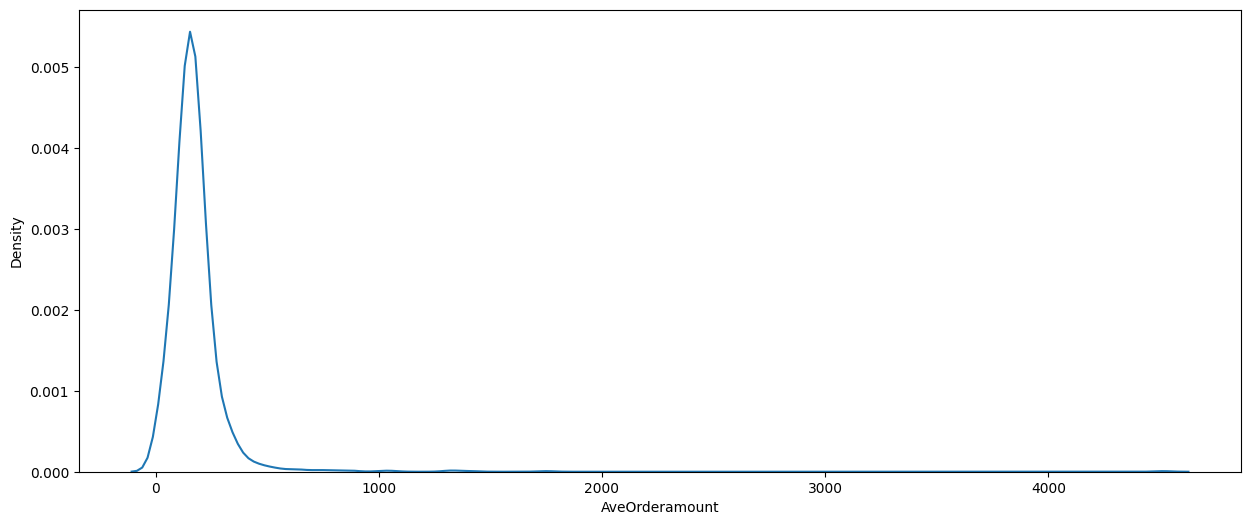

In [221]:
plt.figure(figsize=(15,6))
sns.kdeplot(x= Z["AveOrderamount"])

## Customer Gender Wise analysis

In [96]:
Z["Gender"].value_counts()

Gender
F    934
M    534
Name: count, dtype: int64

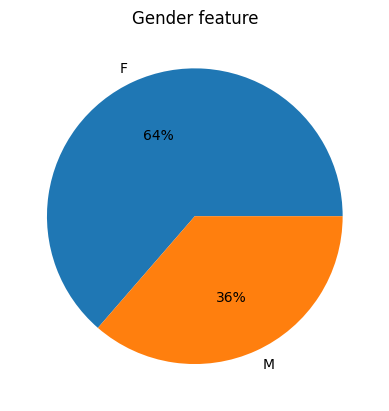

In [97]:
plt.pie(x = Z["Gender"].value_counts().reset_index()["count"],
        labels = Z["Gender"].value_counts().reset_index()["Gender"],
        autopct='%.0f%%')
plt.title("Gender feature")
plt.show()

In [98]:
Z.groupby("Gender")["TotalSpent"].mean()

Gender
F    3253.273761
M    3444.344154
Name: TotalSpent, dtype: float64

<Axes: ylabel='TotalSpent'>

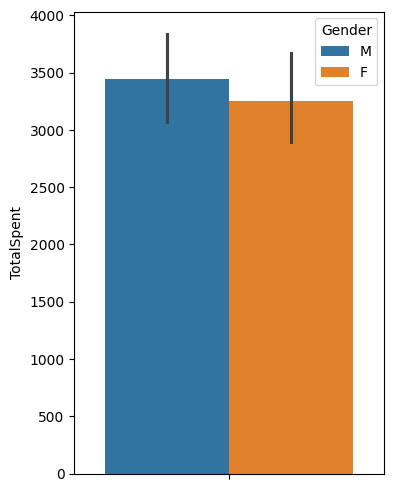

In [224]:
plt.figure(figsize=(4,6))
sns.barplot(data=Z,y="TotalSpent", hue = "Gender", estimator = np.mean)

In [100]:
Z.groupby("Gender")["No of Transactions"].mean()

Gender
F    17.825482
M    18.692884
Name: No of Transactions, dtype: float64

<Axes: ylabel='No of Transactions'>

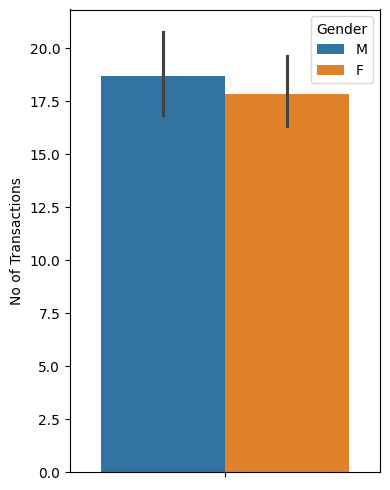

In [225]:
plt.figure(figsize=(4,6))
sns.barplot(data=Z,y="No of Transactions", hue = "Gender", estimator = np.mean)

In [102]:
Z.groupby("Gender")["AveOrderDays"].mean()

Gender
F    63.821742
M    59.469698
Name: AveOrderDays, dtype: float64

<Axes: ylabel='AveOrderDays'>

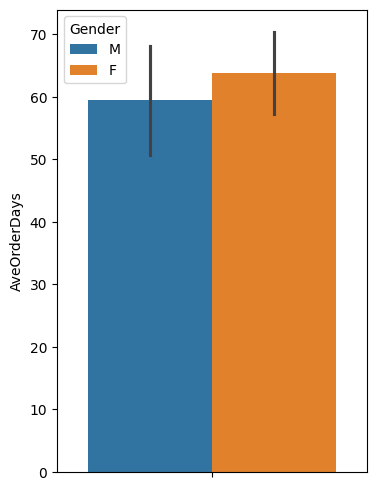

In [226]:
plt.figure(figsize=(4,6))
sns.barplot(data=Z,y="AveOrderDays", hue = "Gender", estimator = np.mean)

In [104]:
pd.crosstab(data["Gender"], data["Coupon_Status"], normalize = "index")

Coupon_Status,0,1
Gender,,
F,0.153513,0.846487
M,0.151981,0.848019


## Customer Location Wise analysis

In [105]:
Z["Location"].value_counts()

Location
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64

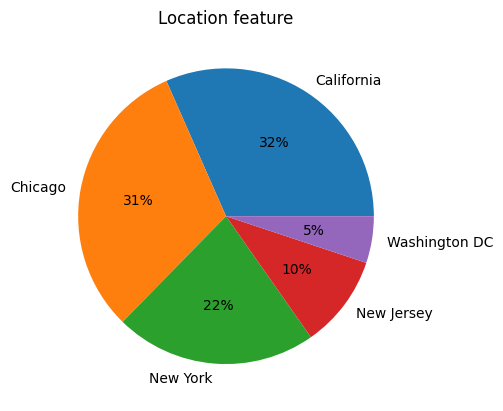

In [106]:
plt.pie(x = Z["Location"].value_counts().reset_index()["count"],
        labels = Z["Location"].value_counts().reset_index()["Location"],
        autopct='%.0f%%')
plt.title("Location feature")
plt.show()

In [107]:
Z.groupby("Location")["TotalSpent"].mean()

Location
California       3244.869756
Chicago          3718.083344
New Jersey       2841.616770
New York         3044.773683
Washington DC    3558.191025
Name: TotalSpent, dtype: float64

<Axes: ylabel='TotalSpent'>

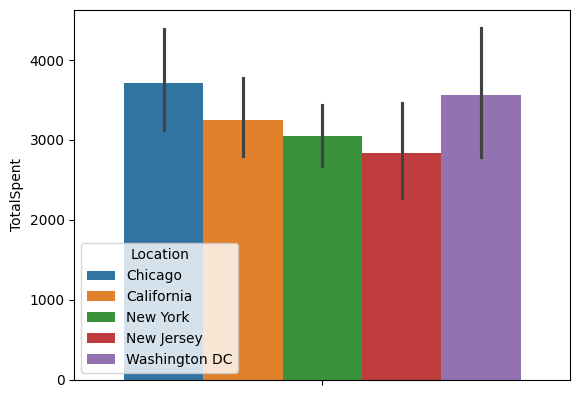

In [229]:
sns.barplot(data=Z,y="TotalSpent", hue = "Location", estimator = np.mean)

In [109]:
Z.groupby("Location")["No of Transactions"].mean()

Location
California       17.366379
Chicago          20.357456
New Jersey       15.355705
New York         17.237654
Washington DC    18.893333
Name: No of Transactions, dtype: float64

<Axes: ylabel='No of Transactions'>

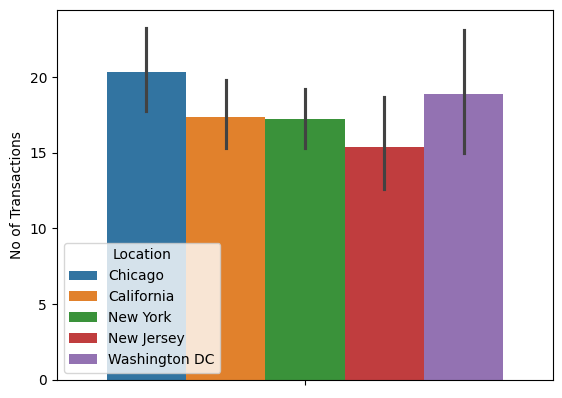

In [110]:
sns.barplot(data=Z,y="No of Transactions", hue = "Location", estimator = np.mean)

In [111]:
Z.groupby("Location")["AveOrderDays"].mean()

Location
California       65.887066
Chicago          61.735516
New Jersey       62.293613
New York         59.730125
Washington DC    53.453651
Name: AveOrderDays, dtype: float64

<Axes: ylabel='AveOrderDays'>

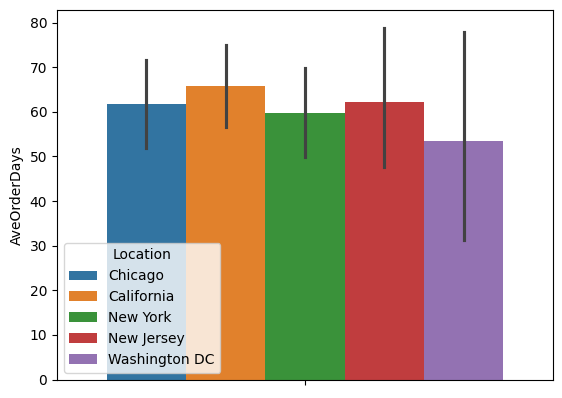

In [112]:
sns.barplot(data=Z,y="AveOrderDays", hue = "Location", estimator = np.mean)

In [113]:
Z["Tenure_Months"].describe()

count    1468.000000
mean       25.912125
std        13.959667
min         2.000000
25%        14.000000
50%        26.000000
75%        38.000000
max        50.000000
Name: Tenure_Months, dtype: float64

In [114]:
pd.crosstab(data["Location"], data["Coupon_Status"], normalize = "index")

Coupon_Status,0,1
Location,,
California,0.148178,0.851822
Chicago,0.157127,0.842873
New Jersey,0.158117,0.841883
New York,0.150273,0.849727
Washington DC,0.155198,0.844802


## RFM Segementation

In [115]:
Z.head()

,CustomerID,Gender,Location,Tenure_Months,firstmonth,lastmonth,firsttransaction,Lasttrasaction,No of Transactions,ActiveDays,AveOrderDays,TotalSpent,AveOrderamount
0,17850,M,Chicago,12,1,1,2019-01-01,2019-01-26,177,25.0,0.141243,38365.75823,216.755696
1,13047,M,California,43,1,12,2019-01-01,2019-12-18,26,351.0,13.500000,2957.89355,113.765137
2,12583,M,Chicago,33,1,8,2019-01-01,2019-08-02,15,213.0,14.200000,3113.65770,207.577180
3,13748,F,California,30,1,1,2019-01-01,2019-01-01,1,365.0,365.000000,7.81688,7.816880
4,15100,M,California,49,1,8,2019-01-01,2019-08-30,6,241.0,40.166667,904.97624,150.829373


In [116]:
A= Z[["CustomerID","lastmonth","No of Transactions","TotalSpent"]]

In [117]:
A.describe()

,CustomerID,lastmonth,No of Transactions,TotalSpent
count,1468.000000,1468.000000,1468.000000,1468.000000
mean,15314.386240,7.760218,18.141008,3322.777569
std,1744.000367,3.350833,24.976414,5329.573632
min,12346.000000,1.000000,1.000000,6.990000
25%,13830.500000,5.000000,5.000000,706.768115
50%,15300.000000,8.000000,11.000000,1833.082050
75%,16882.250000,11.000000,23.000000,4057.899555
max,18283.000000,12.000000,328.000000,80700.626240


In [118]:
A["lastmonth"].sort_values()

0        1
136      1
135      1
134      1
132      1
        ..
462     12
278     12
457     12
536     12
1467    12
Name: lastmonth, Length: 1468, dtype: int32

In [119]:
A["Rtile"] = pd.qcut(A["lastmonth"].sort_values(),5,[1,2,3,4,5])
A["Ftile"] = pd.qcut(A["No of Transactions"].sort_values(),5,[1,2,3,4,5])
A["Mtile"] = pd.qcut(A["TotalSpent"].sort_values(),5,[1,2,3,4,5])

<ipython-input-119-8ed720e78114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["Rtile"] = pd.qcut(A["lastmonth"].sort_values(),5,[1,2,3,4,5])
<ipython-input-119-8ed720e78114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["Ftile"] = pd.qcut(A["No of Transactions"].sort_values(),5,[1,2,3,4,5])
<ipython-input-119-8ed720e78114>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [120]:
A

,CustomerID,lastmonth,No of Transactions,TotalSpent,Rtile,Ftile,Mtile
0,17850,1,177,38365.75823,1,5,5
1,13047,12,26,2957.89355,5,4,4
2,12583,8,15,3113.65770,3,3,4
3,13748,1,1,7.81688,1,1,1
4,15100,8,6,904.97624,3,2,2
...,...,...,...,...,...,...,...
1463,14438,12,5,465.20604,5,2,1
1464,12956,12,14,2610.29915,5,3,4
1465,15781,12,3,599.78042,5,1,2
1466,14410,12,6,931.03157,5,2,2


In [121]:
A["Ftile"] = A["Ftile"].astype("int")
A["Mtile"] = A["Mtile"].astype("int")
A["FMtile"] = ((A["Ftile"]+A["Mtile"])/2)
A["FMtile"] = A["FMtile"].astype("int")
A["FMtile"] = A["FMtile"].astype("category")

<ipython-input-121-9e969411daab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["Ftile"] = A["Ftile"].astype("int")
<ipython-input-121-9e969411daab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["Mtile"] = A["Mtile"].astype("int")
<ipython-input-121-9e969411daab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [122]:
A

,CustomerID,lastmonth,No of Transactions,TotalSpent,Rtile,Ftile,Mtile,FMtile
0,17850,1,177,38365.75823,1,5,5,5
1,13047,12,26,2957.89355,5,4,4,4
2,12583,8,15,3113.65770,3,3,4,3
3,13748,1,1,7.81688,1,1,1,1
4,15100,8,6,904.97624,3,2,2,2
...,...,...,...,...,...,...,...,...
1463,14438,12,5,465.20604,5,2,1,1
1464,12956,12,14,2610.29915,5,3,4,3
1465,15781,12,3,599.78042,5,1,2,1
1466,14410,12,6,931.03157,5,2,2,2


In [123]:
def RFM(data):
  if (data["Rtile"] == 5 and data["FMtile"] == 5) or (data["Rtile"] == 5 and data["FMtile"] == 4) or  (data["Rtile"] == 4 and data["FMtile"] == 5):
    return "Champions"
  elif (data["Rtile"] == 5 and data["FMtile"] == 3) or (data["Rtile"] == 4 and data["FMtile"] == 4) or (data["Rtile"] == 3 and data["FMtile"] == 5) or (data["Rtile"] == 3 and data["FMtile"] == 4):
    return "Loyal Customers"
  elif (data["Rtile"] == 5 and data["FMtile"] == 2) or (data["Rtile"] == 4 and data["FMtile"] == 2) or (data["Rtile"] == 3 and data["FMtile"] == 3) or (data["Rtile"] == 4 and data["FMtile"] == 3):
    return "Potential Loyalists"
  elif (data["Rtile"] == 5 and data["FMtile"] == 1):
    return "Recent Customers"
  elif (data["Rtile"] == 4 and data["FMtile"] == 1) or (data["Rtile"] == 3 and data["FMtile"] == 1):
    return "Promising"
  elif (data["Rtile"] == 3 and data["FMtile"] == 2) or (data["Rtile"] == 2 and data["FMtile"] == 3) or (data["Rtile"] == 2 and data["FMtile"] == 2):
    return "Customer Needing Attention"
  elif (data["Rtile"] == 2 and data["FMtile"] == 1):
    return "About to Sleep"
  elif (data["Rtile"] == 2 and data["FMtile"] == 5) or (data["Rtile"] == 2 and data["FMtile"] == 4) or (data["Rtile"] == 1 and data["FMtile"] == 3):
    return "Customer At Risk"
  elif (data["Rtile"] == 1 and data["FMtile"] == 5) or (data["Rtile"] == 1 and data["FMtile"] == 4):
    return "Cant Lose Them"
  elif (data["Rtile"] == 1 and data["FMtile"] == 2):
    return "Hibernating"
  elif (data["Rtile"] == 1 and data["FMtile"] == 1):
    return "Lost"


In [124]:
A["RFM Segement"] = A.apply(RFM, axis =1)

<ipython-input-124-47a9a936d44a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["RFM Segement"] = A.apply(RFM, axis =1)


In [125]:
A["RFM Segement"].value_counts(normalize = True)* 100

RFM Segement
Loyal Customers               15.667575
Potential Loyalists           14.713896
Customer Needing Attention    14.168937
Champions                     12.738420
Customer At Risk               9.264305
Promising                      7.697548
Lost                           7.152589
About to Sleep                 6.675749
Cant Lose Them                 4.972752
Hibernating                    4.564033
Recent Customers               2.384196
Name: proportion, dtype: float64

<Axes: xlabel='RFM Segement'>

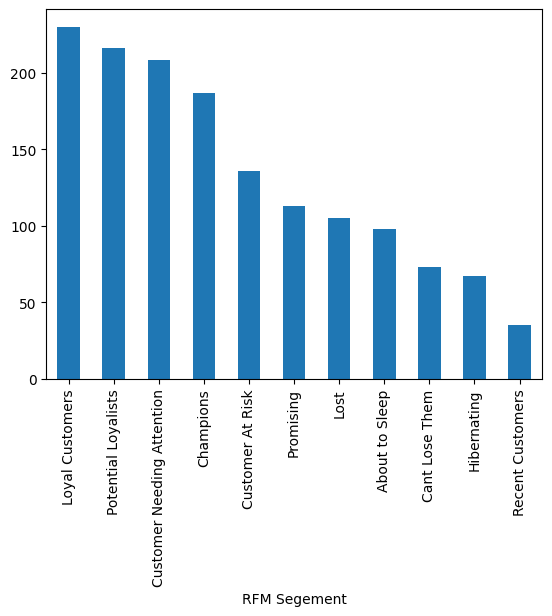

In [126]:
A["RFM Segement"].value_counts().plot(kind ="bar")

## Market Spending and its Impact

In [185]:
Marketing_Spend.head()

,Date,Offline_Spend,Online_Spend,Month,Total_Spend
0,2019-01-01,4500,2424.50,Jan,6924.50
1,2019-01-02,4500,3480.36,Jan,7980.36
2,2019-01-03,4500,1576.38,Jan,6076.38
3,2019-01-04,4500,2928.55,Jan,7428.55
4,2019-01-05,4500,4055.30,Jan,8555.30


In [186]:
Marketing_Spend.Total_Spend.sum()

1733546.4700000002

In [187]:
A= Marketing_Spend.groupby("Month")[["Offline_Spend","Online_Spend","Total_Spend"]].sum().reset_index()
A

,Month,Offline_Spend,Online_Spend,Total_Spend
0,Apr,96000,61026.83,157026.83
1,Aug,85500,57404.15,142904.15
2,Dec,122000,76648.75,198648.75
3,Feb,81300,55807.92,137107.92
4,Jan,96600,58328.95,154928.95
5,Jul,67500,52717.85,120217.85
6,Jun,80500,53818.14,134318.14
7,Mar,73500,48750.09,122250.09
8,May,65500,52759.64,118259.64
9,Nov,93000,68144.96,161144.96


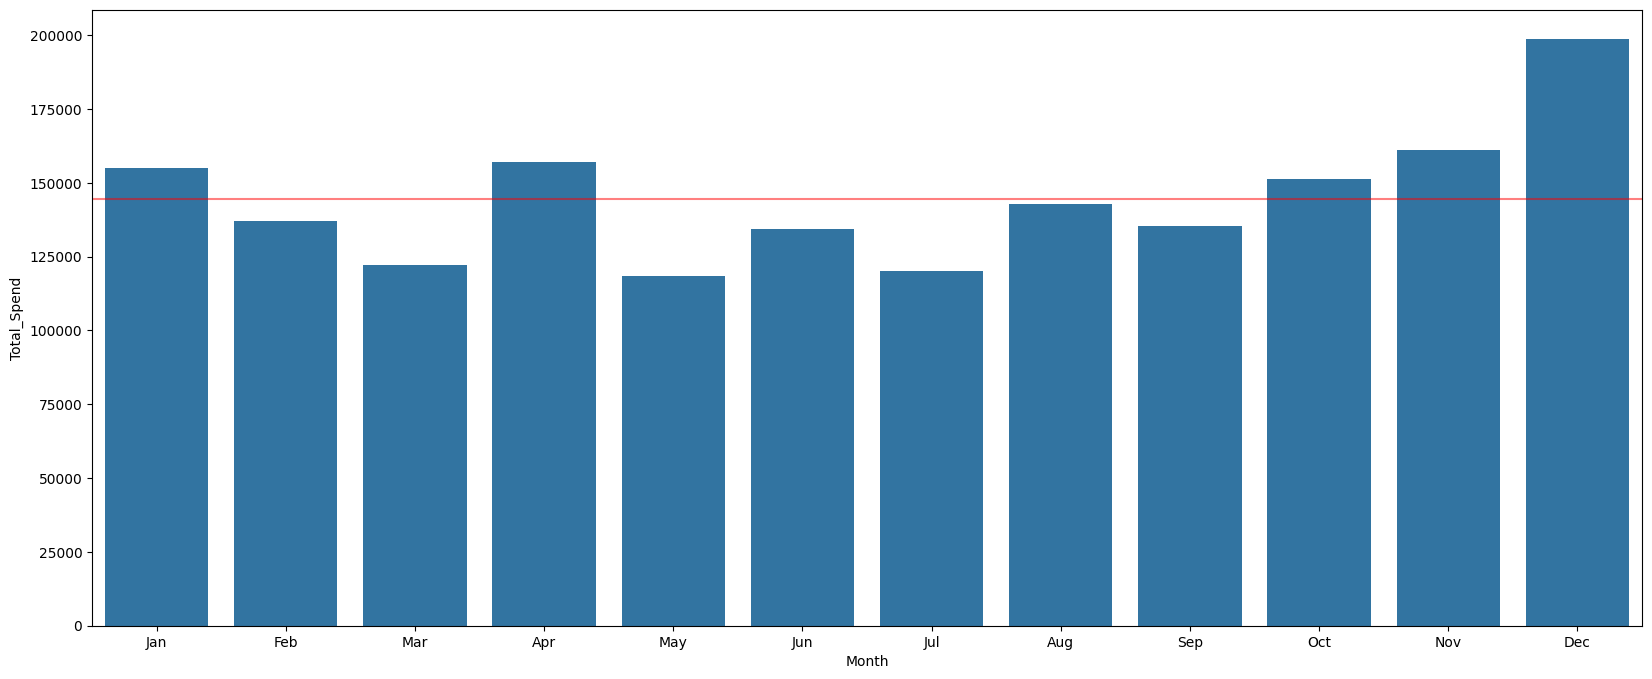

In [188]:
# MarketingSpend MonthWise
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="Month",y = "Total_Spend", order = Online_Sales["Transaction_Month"].unique(),estimator=np.sum)
# drawing average line
ax.axhline(A["Total_Spend"].sum()/12, color='red', alpha = 0.5)

In [189]:
# Invoicevalue per month
B = data.groupby(["Transaction_Month"])["Invoice_value"].sum().reset_index()
B.columns = ["Month","Invoice_value"]
B

,Month,Invoice_value
0,Apr,454557.54294
1,Aug,431970.02304
2,Dec,467526.63756
3,Feb,339053.97194
4,Jan,470488.17309
5,Jul,430673.45689
6,Jun,308923.49697
7,Mar,356260.27661
8,May,328973.50236
9,Nov,492551.06702


In [190]:
C = A.merge(B, on = "Month" )
C

,Month,Offline_Spend,Online_Spend,Total_Spend,Invoice_value
0,Apr,96000,61026.83,157026.83,454557.54294
1,Aug,85500,57404.15,142904.15,431970.02304
2,Dec,122000,76648.75,198648.75,467526.63756
3,Feb,81300,55807.92,137107.92,339053.97194
4,Jan,96600,58328.95,154928.95,470488.17309
5,Jul,67500,52717.85,120217.85,430673.45689
6,Jun,80500,53818.14,134318.14,308923.49697
7,Mar,73500,48750.09,122250.09,356260.27661
8,May,65500,52759.64,118259.64,328973.50236
9,Nov,93000,68144.96,161144.96,492551.06702


In [191]:
C.columns

Index(['Month', 'Offline_Spend', 'Online_Spend', 'Total_Spend',
       'Invoice_value'],
      dtype='object')

In [192]:
C[['Offline_Spend', 'Online_Spend', 'Total_Spend','Invoice_value']].corr()

,Offline_Spend,Online_Spend,Total_Spend,Invoice_value
Offline_Spend,1.000000,0.879841,0.986571,0.638240
Online_Spend,0.879841,1.000000,0.945652,0.677836
Total_Spend,0.986571,0.945652,1.000000,0.669632
Invoice_value,0.638240,0.677836,0.669632,1.000000


<Axes: xlabel='Invoice_value', ylabel='Total_Spend'>

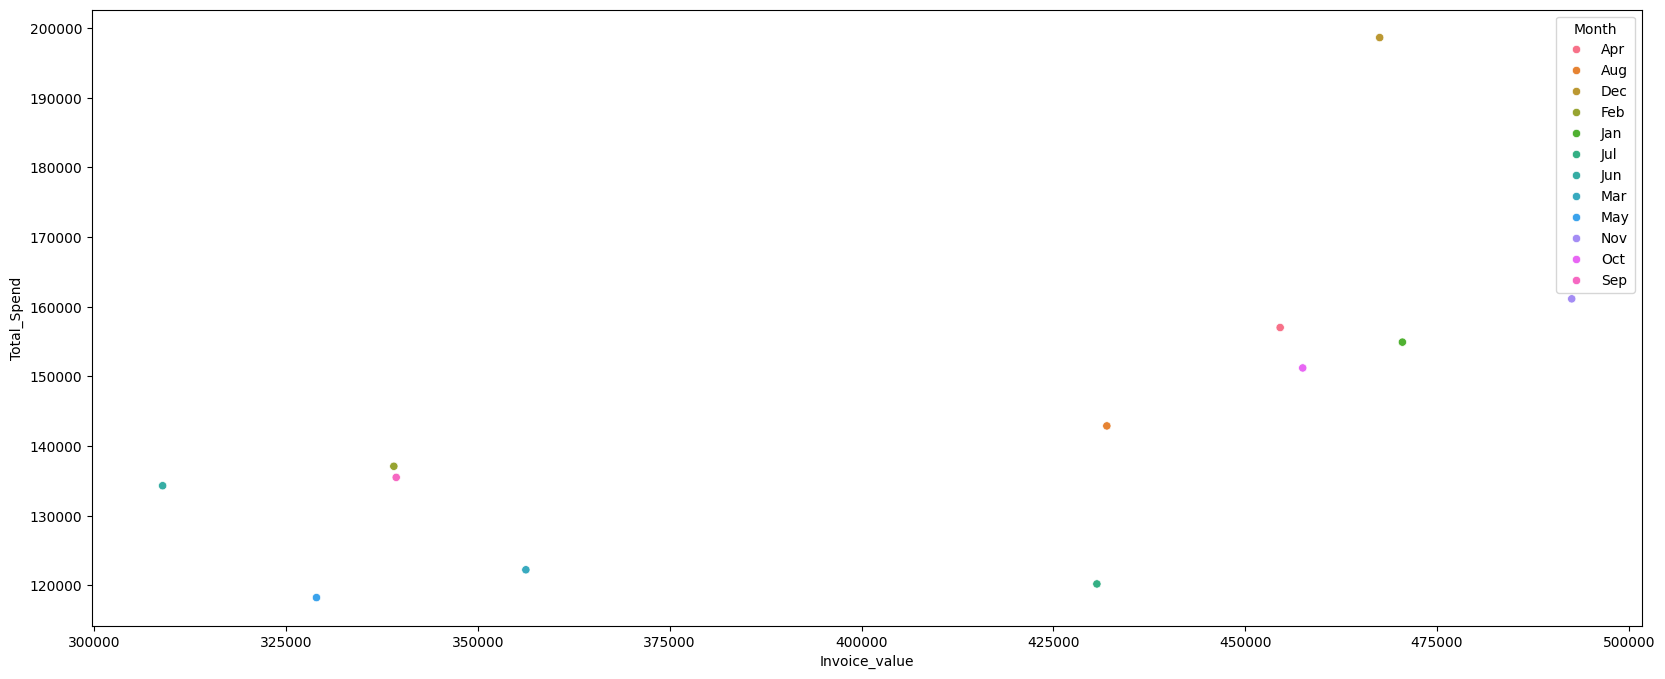

In [197]:
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data=C,x="Invoice_value",y="Total_Spend",hue = "Month")

* lets us do Hypothesis Testing

In [194]:
# H0: No correlation
# Ha: There is correlation

pearson_coeff, p_value = pearsonr(C["Total_Spend"] ,C["Invoice_value"])
print(pearson_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

0.669632332584967
0.01721472742525227
Reject H0
There is correlation


* from the Hypotheis Testing, there is a Postive Correlation between Marketing Spend and Total Invoice value

## Delivery Charges

In [198]:
data["Delivery_Charges"].sum()

556635.07

In [199]:
data["Delivery_Charges"].sum()/data["Invoice_value"].sum()

0.11411513265039057

* 11% of Total Invoice value if of delivery Charges

In [200]:
# Delivery Charges MonthWise
A = data.groupby("Transaction_Month")["Delivery_Charges"].sum().reset_index()
A


,Transaction_Month,Delivery_Charges
0,Apr,41481.74
1,Aug,61099.57
2,Dec,37881.99
3,Feb,49216.60
4,Jan,59242.32
5,Jul,48723.93
6,Jun,37513.58
7,Mar,60799.94
8,May,41396.17
9,Nov,32311.93


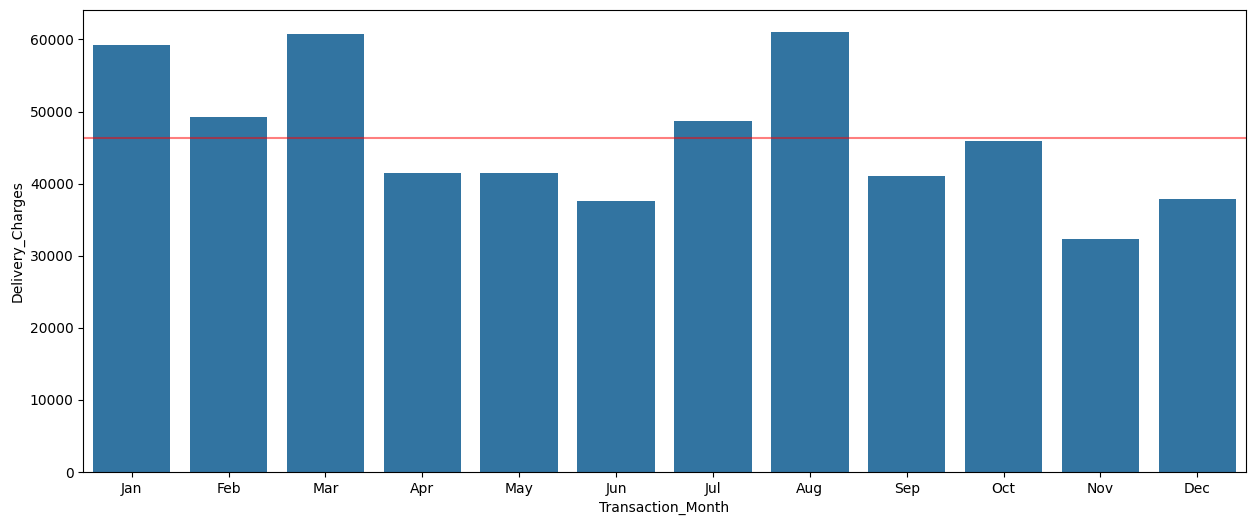

In [201]:
# Delivery Charges MonthWise
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data = A, x ="Transaction_Month",y = "Delivery_Charges", order = Online_Sales["Transaction_Month"].unique())
# drawing average line
ax.axhline(data["Delivery_Charges"].sum()/12, color='red', alpha = 0.5)

* Delivery charges are inirectly Proposationla to no of Orders to some extend

In [202]:
# Ave Delivery Charges per TransactionID
A = data.groupby("Transaction_ID")[["Delivery_Charges","Invoice_value"]].sum().reset_index()
A


,Transaction_ID,Delivery_Charges,Invoice_value
0,16679,6.50,158.67290
1,16680,6.50,158.67290
2,16681,6.50,8.52950
3,16682,65.00,801.64840
4,16684,13.00,336.76960
...,...,...,...
25056,48493,6.50,99.90100
25057,48494,6.50,46.90792
25058,48495,6.50,123.44760
25059,48496,6.50,316.50200


In [203]:
A["DeliveryChargetoInvoice"] = A["Delivery_Charges"]/A["Invoice_value"]

In [204]:
A["Delivery_Charges"].describe()

count    25061.000000
mean        22.211207
std         93.283389
min          0.000000
25%          6.000000
50%          6.500000
75%         18.000000
max       9396.000000
Name: Delivery_Charges, dtype: float64

In [205]:
A["DeliveryChargetoInvoice"].describe()

count    25061.000000
mean         0.166907
std          0.174529
min          0.000000
25%          0.043271
50%          0.073435
75%          0.268739
max          0.938571
Name: DeliveryChargetoInvoice, dtype: float64

<Axes: xlabel='DeliveryChargetoInvoice', ylabel='Count'>

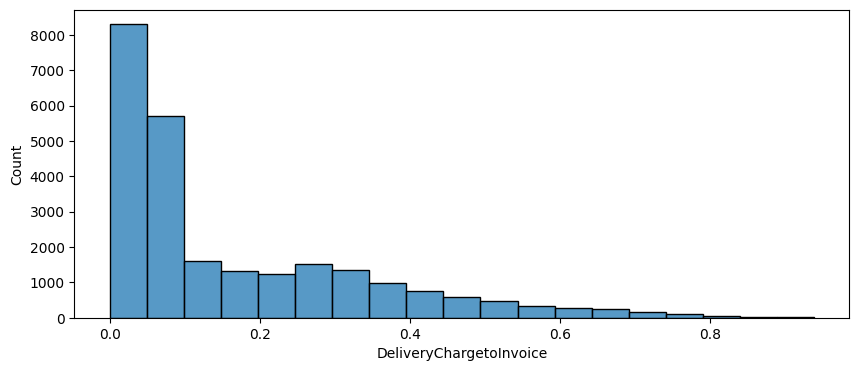

In [206]:
plt.figure(figsize=(10,4))
sns.histplot(A["DeliveryChargetoInvoice"], bins=19)

In [207]:
A[["Delivery_Charges","Invoice_value"]].mean()

Delivery_Charges     22.211207
Invoice_value       194.638581
dtype: float64

## Impact of Discounts on Revenue

In [208]:
data["Discount_pct"].describe()

count    52924.000000
mean         0.198024
std          0.082789
min          0.000000
25%          0.100000
50%          0.200000
75%          0.300000
max          0.300000
Name: Discount_pct, dtype: float64

In [209]:
data["Discount_pct"].value_counts()

Discount_pct
0.2    17830
0.1    17470
0.3    17224
0.0      400
Name: count, dtype: int64

In [216]:
A = data.groupby("Discount_pct").aggregate({"Invoice_value": ["mean","sum","count"]}).reset_index()
A.columns =["Discount_pct","Invoice_mean","Invoice_sum","count"]
A

,Discount_pct,Invoice_mean,Invoice_sum,count
0,0.0,92.373352,3.694934e+04,400
1,0.1,102.879107,1.797298e+06,17470
2,0.2,88.681043,1.581183e+06,17830
3,0.3,84.905198,1.462407e+06,17224


<Axes: xlabel='Discount_pct', ylabel='count'>

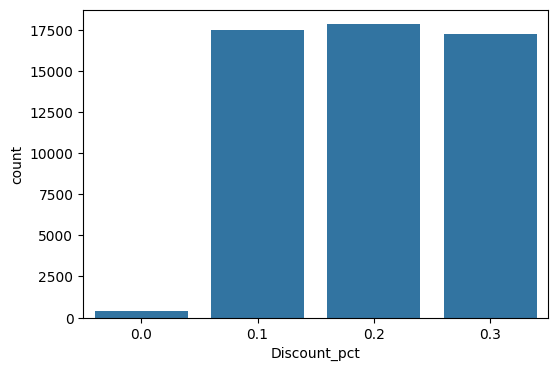

In [220]:
plt.figure(figsize=(6,4))
sns.barplot(data=A,x="Discount_pct",y="count")

<Axes: xlabel='Discount_pct', ylabel='Invoice_mean'>

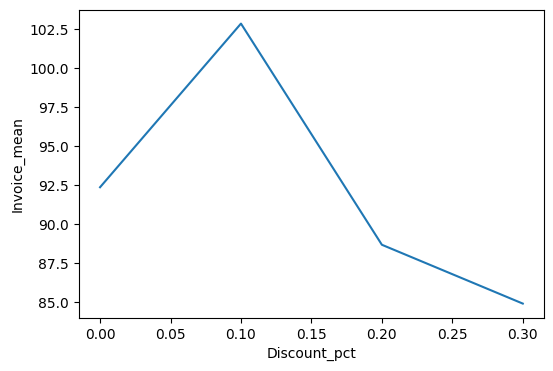

In [218]:
plt.figure(figsize=(6,4))
sns.lineplot(data=A,x="Discount_pct",y="Invoice_mean")

<Axes: xlabel='Discount_pct', ylabel='Invoice_sum'>

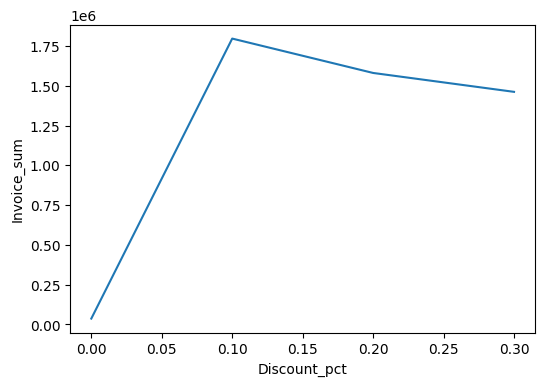

In [219]:
plt.figure(figsize=(6,4))
sns.lineplot(data=A,x="Discount_pct",y="Invoice_sum")

* Dicsount_Pct has less impact on Invoice Amount
* Conversly more Average Revenue value is High for least Discout i.e., 10%
* So E-Commerce can reduce the discount percentage to increase Profits

## Impact of day of week

In [179]:
A = data.groupby(["Transaction_ID","weekday"])["Invoice_value"].sum().reset_index()
A

,Transaction_ID,weekday,Invoice_value
0,16679,1,158.67290
1,16680,1,158.67290
2,16681,1,8.52950
3,16682,1,801.64840
4,16684,1,336.76960
...,...,...,...
25056,48493,1,99.90100
25057,48494,1,46.90792
25058,48495,1,123.44760
25059,48496,1,316.50200


In [181]:
B = A.groupby("weekday").aggregate({"Transaction_ID":"count", "Invoice_value":"sum"}).reset_index()
B

,weekday,Transaction_ID,Invoice_value
0,0,2130,370380.30997
1,1,2315,406077.81020
2,2,4378,863196.07515
3,3,4278,882230.95710
4,4,4233,905204.20330
5,5,3872,715716.50695
6,6,3855,735031.60789


<Axes: xlabel='weekday', ylabel='Invoice_value'>

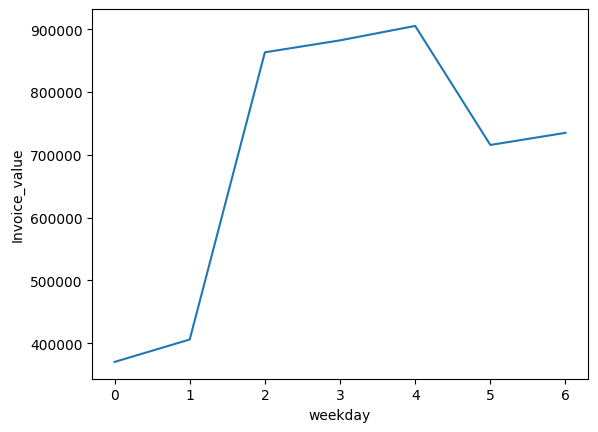

In [182]:
# 0--> Monday , 6--> Sunday
sns.lineplot(data=B,x="weekday",y="Invoice_value")

<Axes: xlabel='weekday', ylabel='Transaction_ID'>

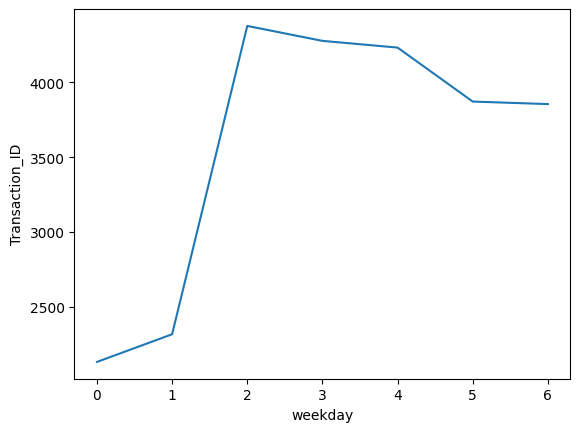

In [184]:
# 0--> Monday , 6--> Sunday
sns.lineplot(data=B,x="weekday",y="Transaction_ID")

## Products

In [152]:
A = data.groupby("Product_Category")["Quantity"].sum().sort_values(ascending = False).reset_index()
A

,Product_Category,Quantity
0,Office,88383
1,Apparel,32438
2,Drinkware,30501
3,Lifestyle,24881
4,Nest-USA,21430
5,Bags,15273
6,Notebooks & Journals,9556
7,Headgear,3533
8,Nest,2837
9,Housewares,2484


<Axes: xlabel='Product_Category', ylabel='Quantity'>

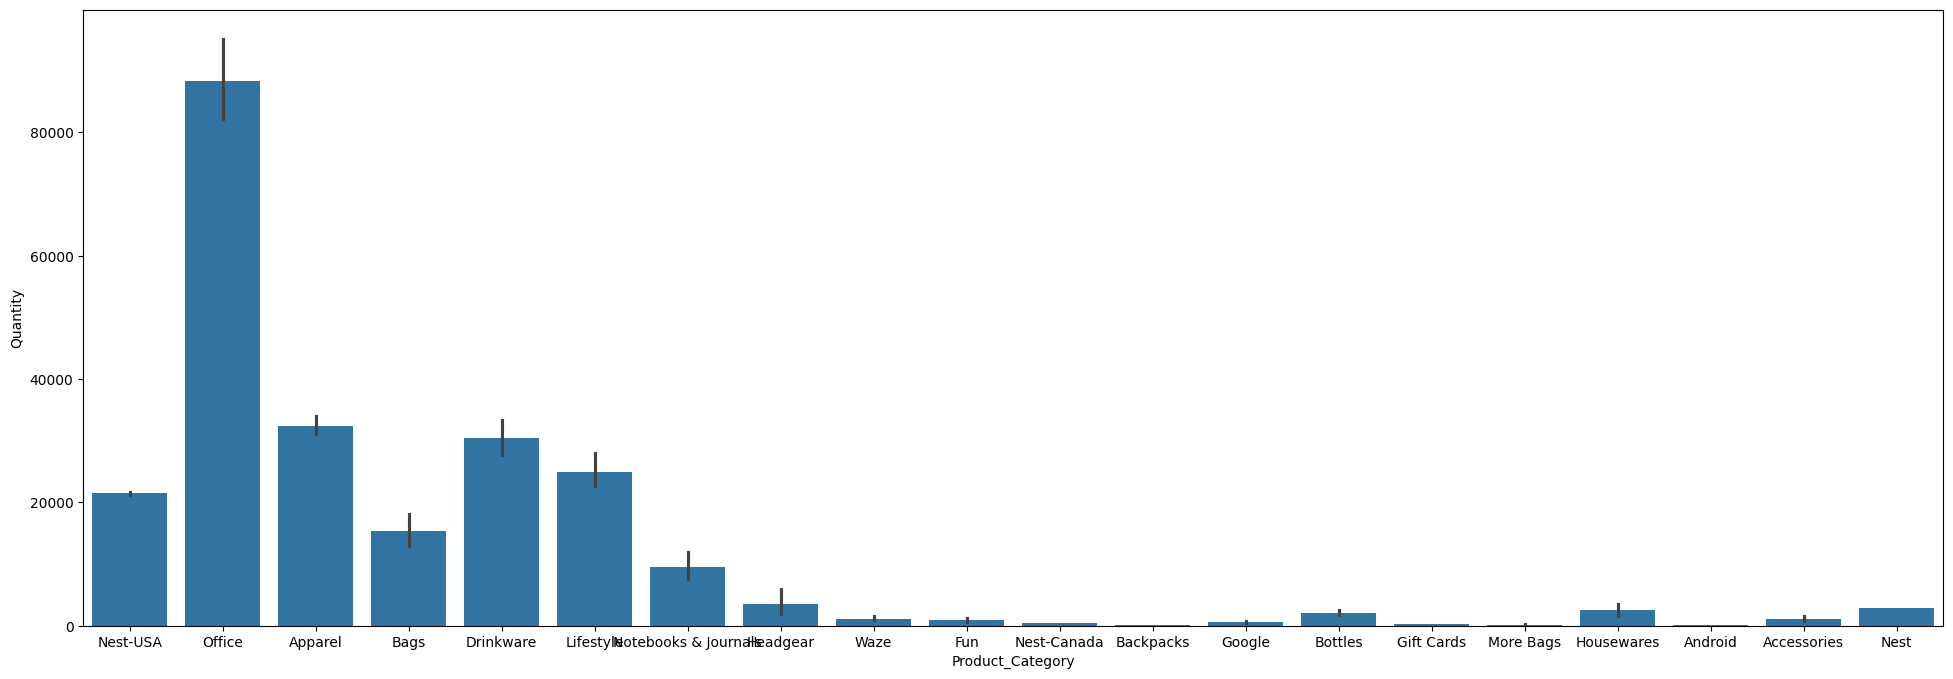

In [262]:
plt.figure(figsize=(24,8))
sns.barplot(data=data,x="Product_Category",y="Quantity",estimator = np.sum)

In [154]:
A = data.groupby("Product_Description")["Quantity"].sum().sort_values(ascending = False).reset_index()
A.head()

,Product_Description,Quantity
0,Maze Pen,16234
1,Google 22 oz Water Bottle,14282
2,Google Sunglasses,11452
3,Sport Bag,7321
4,Google Metallic Notebook Set,6496


In [155]:
A.tail()

,Product_Description,Quantity
399,Google Tee Red,3
400,Android 5-Panel Low Cap,3
401,Compact Journal with Recycled Pages,1
402,Android Women's Short Sleeve Tri-blend Badge T...,1
403,Google Women's Colorblock Tee White,1


## Market Basket Analysis

In [256]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,weekday,month,Invoice_value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,1,Jan,ELEC10,0.1,0.10,M,Chicago,12,1,1,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,1,Jan,ELEC10,0.1,0.10,M,Chicago,12,1,1,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,1,Jan,OFF10,0.1,0.10,M,Chicago,12,1,1,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,0,Jan,SALE10,0.1,0.18,M,Chicago,12,1,1,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,1,Jan,AIO10,0.1,0.18,M,Chicago,12,1,1,24.0230


In [257]:
A= data[["Transaction_ID","Product_Description"]]

In [258]:
A

,Transaction_ID,Product_Description
0,16679,Nest Learning Thermostat 3rd Gen-USA - Stainle...
1,16680,Nest Learning Thermostat 3rd Gen-USA - Stainle...
2,16681,Google Laptop and Cell Phone Stickers
3,16682,Google Men's 100% Cotton Short Sleeve Hero Tee...
4,16682,Google Canvas Tote Natural/Navy
...,...,...
52919,48493,Nest Cam Indoor Security Camera - USA
52920,48494,Google Zip Hoodie Black
52921,48495,Nest Learning Thermostat 3rd Gen-USA - White
52922,48496,Nest Protect Smoke + CO White Wired Alarm-USA


In [259]:
B = A.merge(A,on="Transaction_ID")
B = B[B["Product_Description_x"]>B["Product_Description_y"]]
B

,Transaction_ID,Product_Description_x,Product_Description_y
4,16682,Google Men's 100% Cotton Short Sleeve Hero Tee...,Google Canvas Tote Natural/Navy
6,16682,Google Men's 100% Cotton Short Sleeve Hero Tee...,Google 22 oz Water Bottle
7,16682,Google Men's 100% Cotton Short Sleeve Hero Tee...,Google Infuser-Top Water Bottle
8,16682,Google Men's 100% Cotton Short Sleeve Hero Tee...,Engraved Ceramic Google Mug
10,16682,Google Men's 100% Cotton Short Sleeve Hero Tee...,Galaxy Screen Cleaning Cloth
...,...,...,...
230587,48489,Nest Protect Smoke + CO White Wired Alarm-USA,Google Women's Short Sleeve Hero Tee White
230588,48489,Nest Protect Smoke + CO White Wired Alarm-USA,Google Trike Tee Black
230594,48491,Nest Protect Smoke + CO White Battery Alarm-USA,Nest Cam Indoor Security Camera - USA
230597,48491,Nest Thermostat E - USA,Nest Cam Indoor Security Camera - USA


In [260]:
C= B.groupby(["Product_Description_x","Product_Description_y"])["Transaction_ID"].count().sort_values(ascending=False).reset_index()

In [261]:
C.head(20)

,Product_Description_x,Product_Description_y,Transaction_ID
0,Nest Cam Outdoor Security Camera - USA,Nest Cam Indoor Security Camera - USA,693
1,Google Sunglasses,Google 22 oz Water Bottle,391
2,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Cam Outdoor Security Camera - USA,301
3,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Cam Indoor Security Camera - USA,228
4,Nest Protect Smoke + CO White Battery Alarm-USA,Nest Learning Thermostat 3rd Gen-USA - Stainle...,226
5,Nest Protect Smoke + CO White Battery Alarm-USA,Nest Cam Outdoor Security Camera - USA,192
6,Windup Android,Google Sunglasses,190
7,Google Sunglasses,Google Laptop and Cell Phone Stickers,183
8,Nest Protect Smoke + CO White Wired Alarm-USA,Nest Learning Thermostat 3rd Gen-USA - Stainle...,181
9,Google Sunglasses,Google Kick Ball,157
